In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')
from jsm_massfunc import CSMF, cumulative, CSMF_old, H2H_CSMF
from jsm_datareduc import prep_data
import galhalo
import anaclass


In cases with a large amount of scatter, small systems scattering to large
stellar masses will dominate over large systems scattering to low
stellar masses. This is simply because there are so many more low mass subhalos than there are high mass subhalos

### first just a single realization! see how it changes with a change in slope and scatter!

In [2]:
massmat = anaclass.MassMat("../../data/3000_12_8/acc_surv_mass.npy")
massmat.prep_data()

In [3]:
index = 1232
lgMh = massmat.lgMh[index]
lgMs = galhalo.lgMs_D22_det(lgMh)
mass_bins = np.linspace(3,9,45)
CSMF_counts = cumulative(lgMs, mass_bins)

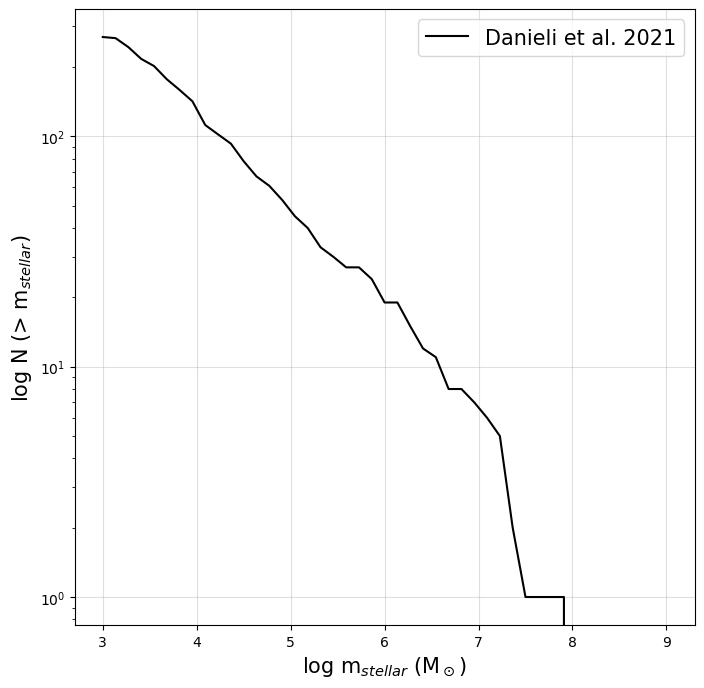

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(mass_bins, CSMF_counts, color="black", label="Danieli et al. 2021")
plt.yscale("log")
plt.grid(alpha=0.4)
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### now the adding scatter in the SHMR

In [54]:
scatter_pix = 25
scatter_range = np.round(np.linspace(0,2,scatter_pix), 3)
N_samples=10

In [55]:
mat = np.zeros(shape=(scatter_pix, N_samples, lgMh.shape[0]))

for i, dex in enumerate(scatter_range):
    mat[i] = galhalo.master_SHMR_1D(lgMh, sigma=dex, N_samples=N_samples) # comes out in log mass

not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter
not normalizing for the upscatter


In [56]:
new_mat = np.zeros(shape=(scatter_pix,N_samples,45))

for k in range(scatter_pix):
    for n in range(N_samples):
  
        new_mat[k,n] = cumulative(mat[k,n, :], mass_bins)

In [57]:
across_samp = np.average(new_mat, axis=1) # now lets look at the values!!

In [58]:
norm = mpl.colors.Normalize(vmin=scatter_range.min(), vmax=scatter_range.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, scatter_pix))

In [59]:
halo_masses = np.linspace(7,11,100)

B13_star = galhalo.lgMs_B13(halo_masses)
RP17_star = galhalo.lgMs_RP17(halo_masses)

In [60]:
B13_c = cumulative(galhalo.lgMs_B13(lgMh), mass_bins)

RP17_c = cumulative(galhalo.lgMs_RP17(lgMh), mass_bins)

In [61]:
testy = []
for i in range(scatter_pix):
    lgMs = galhalo.master_SHMR_1D(halo_masses)
    up = scatter_range[i] + lgMs
    down = lgMs - scatter_range[i]
    testy.append([up, down])

assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR
assuming a deterministic SHMR


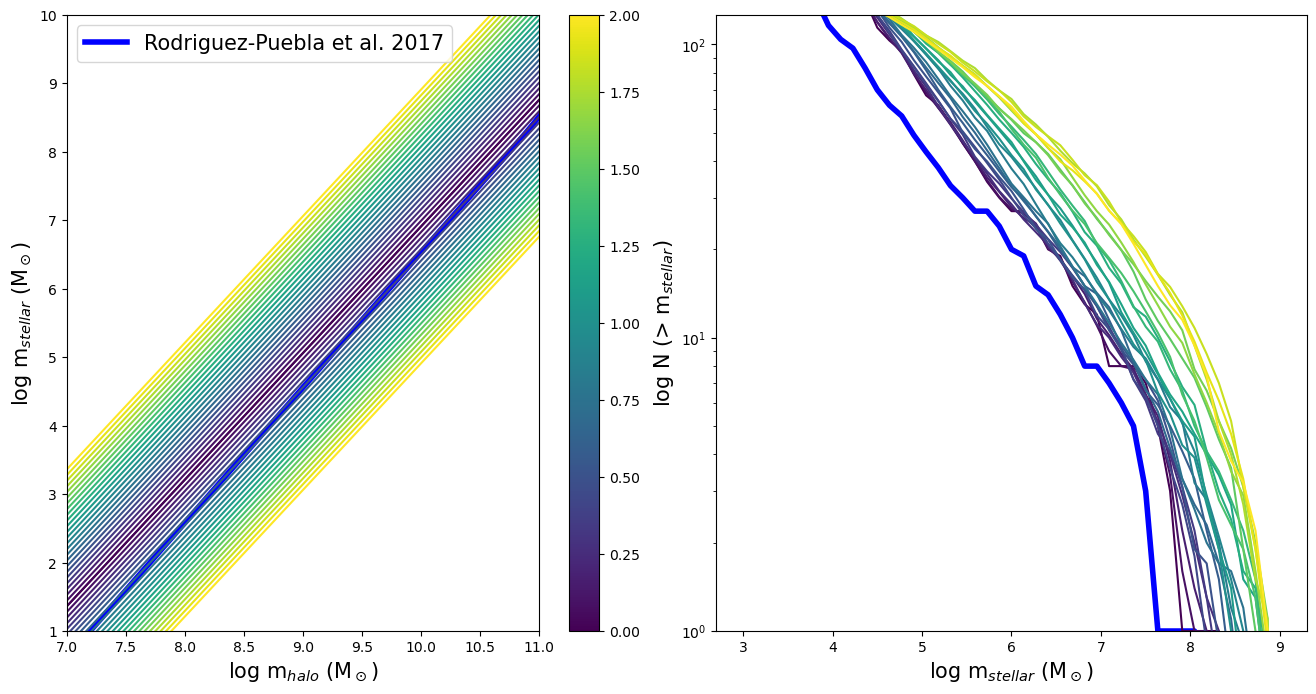

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(16,8), sharey=False)

axs[1].plot(mass_bins, RP17_c, lw=4, color="blue")

axs[0].plot(halo_masses, RP17_star, lw=4, label="Rodriguez-Puebla et al. 2017", color="blue")

for i in range(scatter_pix):
    axs[0].plot(halo_masses, testy[i][0], color=colors[i])
    axs[0].plot(halo_masses, testy[i][1], color=colors[i])
    axs[1].plot(mass_bins, across_samp[i], color=colors[i])

axs[0].set_ylabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[0].set_xlabel("log m$_{halo}$ (M$_\odot$)", fontsize=15)
axs[0].set_xlim(7,11)
axs[0].legend(fontsize=15)
axs[0].set_ylim(1,10)


cb = fig.colorbar(cmap, ax=axs[0])

axs[1].set_yscale("log")
axs[1].set_xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[1].set_ylabel("log N (> m$_{stellar}$)", fontsize=15)
#axs[1].set_yscale("log")
axs[1].set_ylim(10**0, 10**2.1)
plt.subplots_adjust(wspace=0.1)
plt.show()